# The Sparks Foundation
## Data Science and AI Internship
### __Task 3__: Perform EDA on SampleSuperstore to identify weak areas and improve them

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [1]:
#warnings library
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### 2.Check for Duplicates

In [10]:
data.duplicated().sum()

17

In [11]:
# so, there are total of 17 duplicate values. Lets drop them
data.drop_duplicates(subset=None, keep= 'first', inplace= True)

In [12]:
data.duplicated().sum()

0

#### Now, we have no duplicates

### 3. Generate heatmap to understand correlation

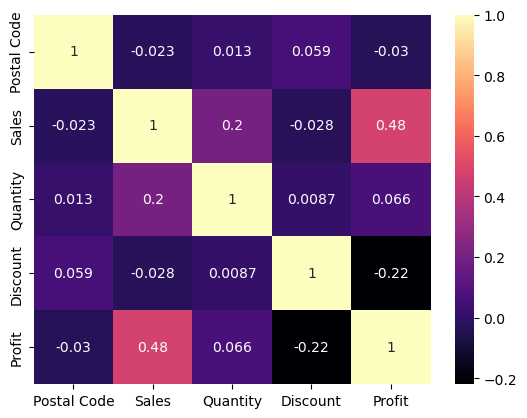

In [18]:
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='magma')
plt.show()

In [19]:
# as postal code have no correlation with any of the other variables. It is better we remove it by cnverting them into object type.
data['Postal Code'] = data['Postal Code'].astype('object')

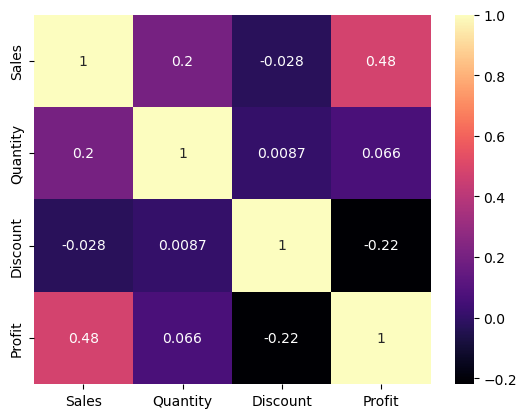

In [20]:
#doing correlation again
corr = data.corr()
sns.heatmap(corr,annot=True,cmap='magma')
plt.show()

# 4. Visualization using Pair plot

In [21]:
# but first remove the Postal Code column.
data = data.drop(['Postal Code'],axis=1)

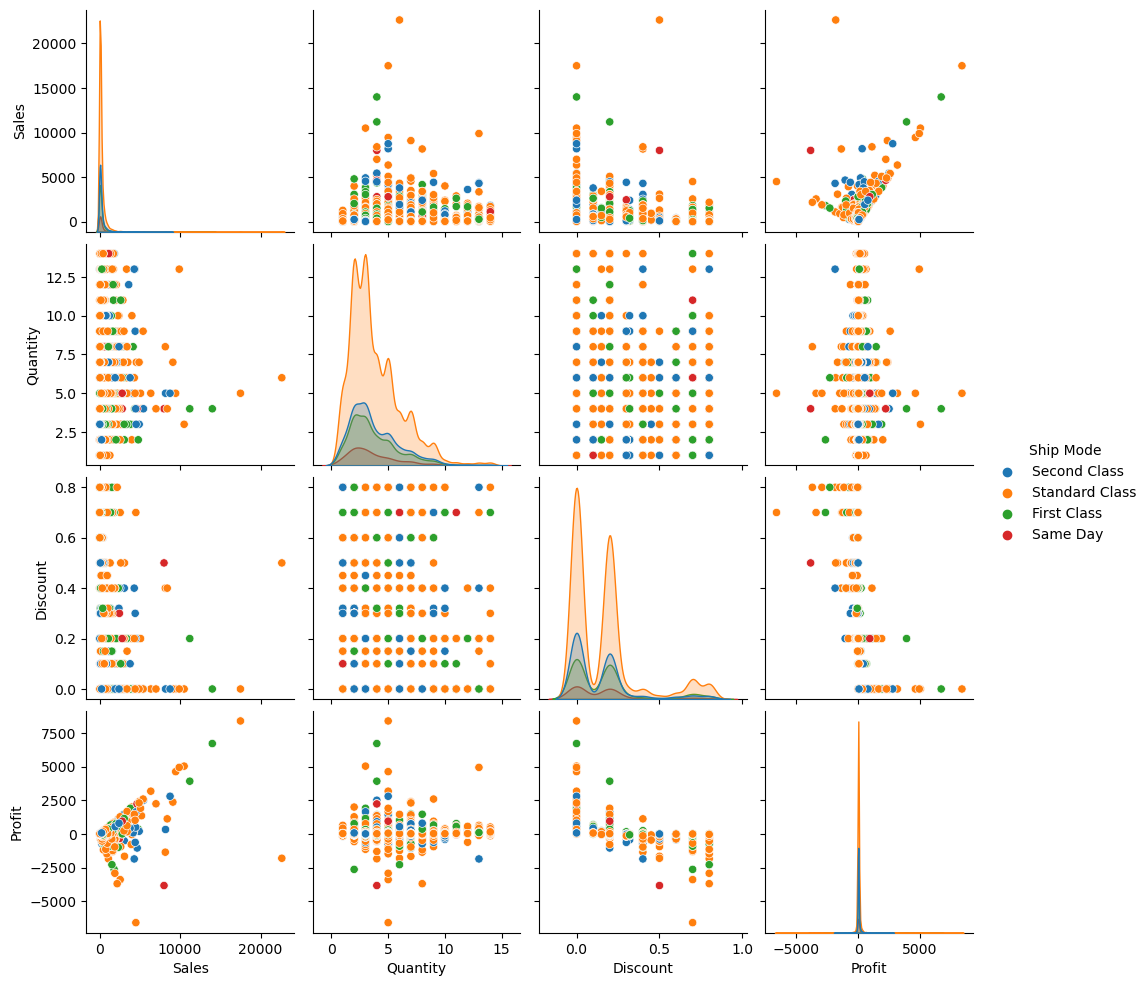

In [24]:
sns.pairplot(data, hue='Ship Mode')

<Axes: xlabel='Ship Mode', ylabel='count'>

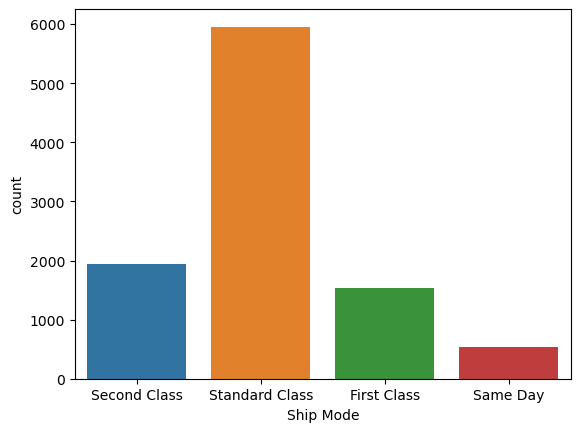

In [27]:
sns.countplot(x = data['Ship Mode'])

In [28]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [29]:
data['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

<Axes: xlabel='Region', ylabel='count'>

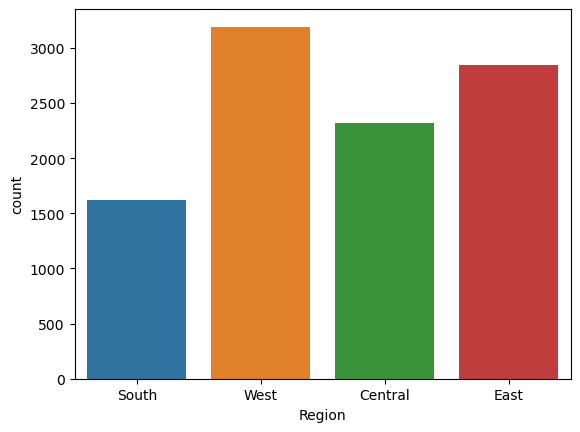

In [30]:
sns.countplot( x = data['Region'])

In [32]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

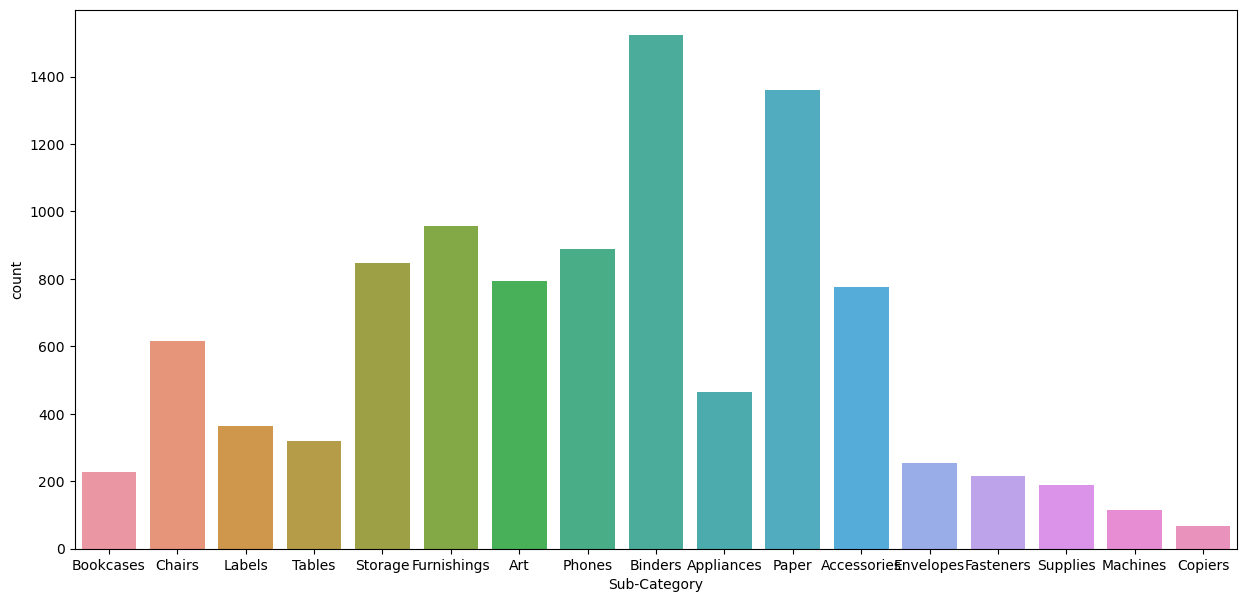

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(data= data, x = 'Sub-Category')
plt.show()

## Observation 1
### Maximum Sales are from Binders, Paper and minimum are from Machines, Copiers

In [37]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

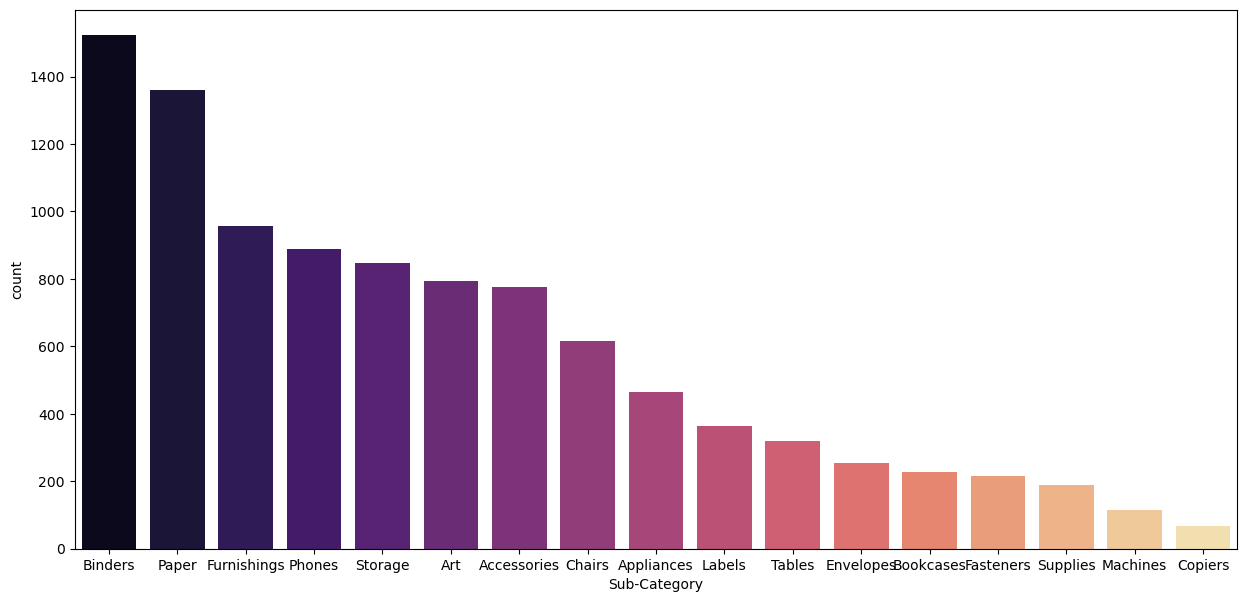

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(data = data, x = data['Sub-Category'], order= data['Sub-Category'].value_counts().index, palette='magma')
plt.show()

## Observation 2
### Highest number of buyers are from _California_ and _New York_

In [47]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

## Observation 3
### No correlation between Profit and Discount

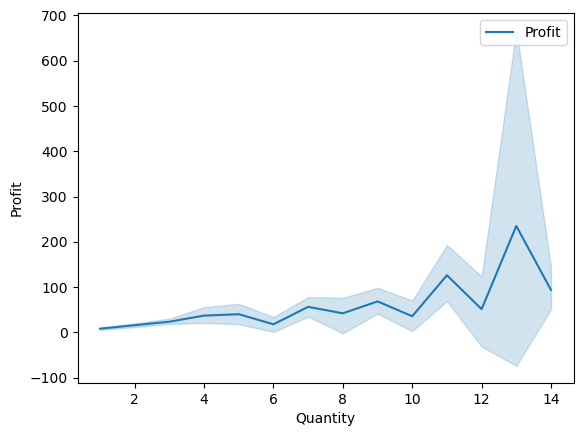

In [49]:
sns.lineplot(data = data, x = 'Quantity',y = 'Profit',label = 'Profit')
plt.legend()
plt.show()

## Observation 4
### Profit & Sales are maximum is consumer segment, and minimum is Home office segment

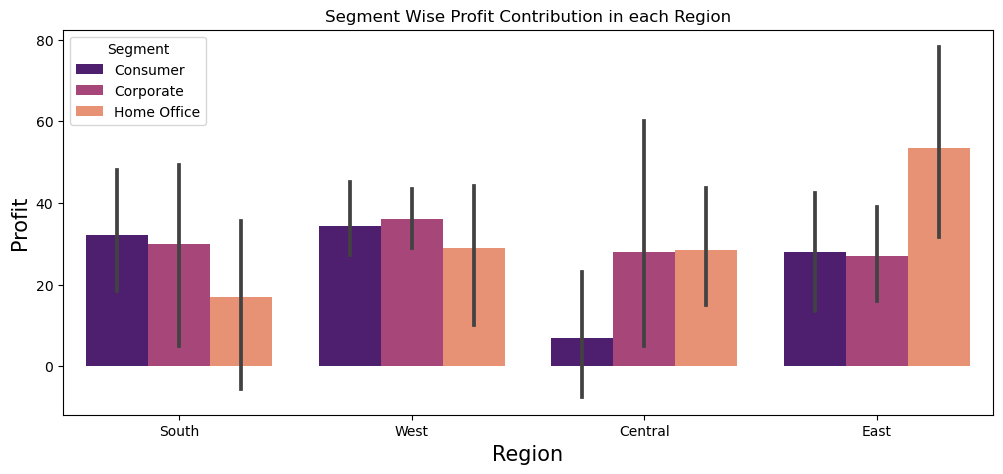

In [55]:
plt.figure(figsize=(12,5))
plt.title("Segment Wise Profit Contribution in each Region")
sns.barplot(data= data, x = 'Region', y= 'Profit', hue='Segment', palette='magma')
plt.xlabel("Region",fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.show()